<a href="https://colab.research.google.com/github/Aritra2k24/machine-learning/blob/main/Copy_of_01_Introduction_to_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

In [ ]:
import torch
torch.__version__

'2.6.0+cu124'

we create model in pytorch to learn data and the its patterns

# Linear Regression Model

creating the data

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end , step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
X.shape

torch.Size([50, 1])

In [ ]:
len(X), len(y)

(50, 50)

# Splitting the data into training and test sets(one of the most important concepts in machine learning in general)

let's create a training and test set for the data

In [ ]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

# Visualization of Data

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_prediction(train_data = X_train,train_labels = y_train, test_data = X_test, test_labels = y_test,predictions = None):
  plt.figure(figsize = (10,7))
  # plotting the training set
  plt.scatter(train_data, train_labels, c = "b",label = 'Training data')
  # plotting the test set
  plt.scatter(test_data, test_labels, c= 'g',label = 'Testing data')
  # plotting the predictions and check if it matches the test set plot
  if predictions is not None:
    plt.scatter(X_test, predictions,c = 'r',label = 'Predictions')
  plt.legend(prop={"size" :14});

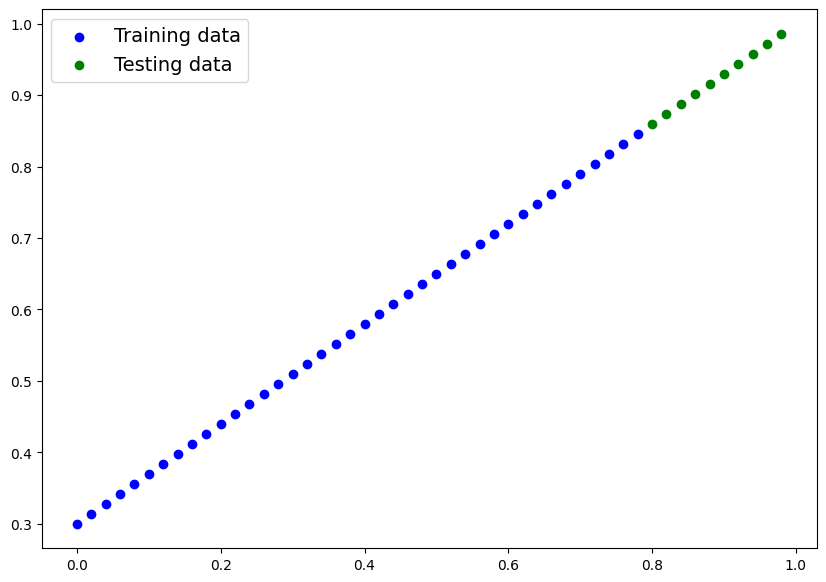

In [ ]:
plot_prediction();

# Build Model in Pytorch

Create the linear regression model here
what our model does:

*  start with random value(weight and bias)

*  Look at the training data and adjust the random values to better represent
   (or get closer to) the ideal values(weight and bias) we used to create the data



In [ ]:
from torch import nn
# create a linear regression model class#
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    # create the weights and bias
    self.weight = nn.Parameter(torch.randn(1,requires_grad = True, dtype =torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True, dtype = torch.float))
    # the computation part
  def forward(self, x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegression()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Making prediction using torch.inference_mode()
To check our model's predictive power, let's see how well it predicts y_test based on X_test

When we pass data through our model, it's going to run it through the forward() method.

In [ ]:
model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
# make predictions with model
with torch.inference_mode(): # no gradient tracking and calculation during making predictions #
  y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

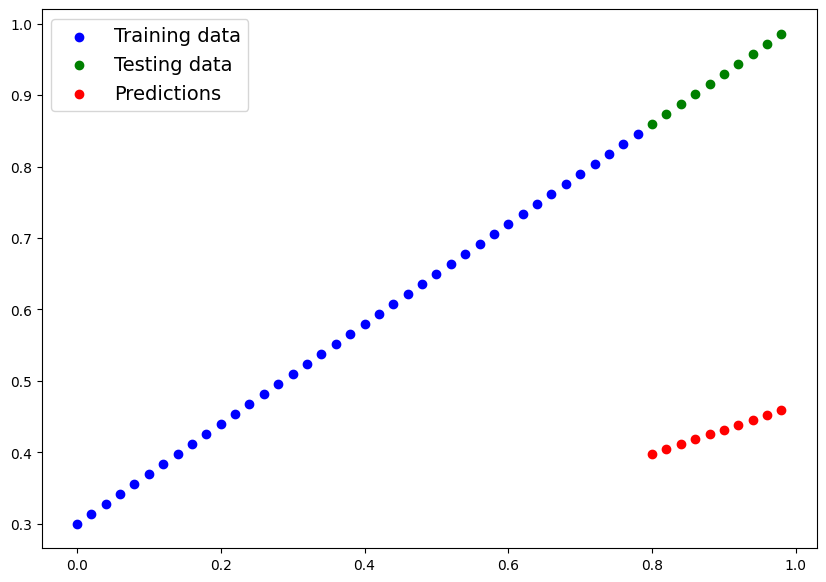

In [ ]:
plot_prediction(predictions = y_pred)

In [ ]:
model_0.weight

Parameter containing:
tensor([0.3367], requires_grad=True)

In [ ]:
model_0.bias

Parameter containing:
tensor([0.1288], requires_grad=True)

In [ ]:
model_0.forward(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:
model_0(X_test)

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

# Model parameters in the list form

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

# Model parameters in the dictionary form

In [ ]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

# Evaluation of the model
We can do that by defining a loss function(or cost function) and an optimizer to find the optimal value of our model parameters to make our prediction more close to the actual output value.

Loss Function:- Find the mean difference of the predicted datapoints and the actual datapoints

Optimizer:- Optimize the loss function with various traditional algorithm to make the prediction better

Inside the optimizer there are a set of parameters:


*   params - the model parameters we like to optimize, for example params = model_0.parameters()
*   lr(learning rate) - the learning rate is a hyperparameter that defines how big/small the optimizer changes the parameters with each step(a small lr results in small changes , a large lr results in large changes)





In [ ]:
# set up a loss function
loss_fn = torch.nn.L1Loss()     # loss_fn = torch.mean(torch.abs(y_pred-y_test)) # Mean Absolute Error #
# Set up the optimizer #
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01,momentum = 0.9)

Which loss function and optimizer should I use?

This will be the problem specific. But with experience, you'll get an idea of what works and what does'nt with your particular problem set

For example, for a regression problem, a loss func. of` nn.L1Loss()`and an optimizer like
`torch.optim.SGD()` will suffice

But for a classification problem like classifying whether a photo is of dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)






# Building a training loop and testing loop

In [ ]:
# an epoch is one loop through the data..(this is a hyperparameter)
epochs = 200
# tracking the values through the training loop #
epoch_count = []
loss_values = []
test_loss_values = []

# loop through the data
for epoch in range(epochs):
  # set the model into training mode...

  model_0.train() # train mode in pytorch sets all parameters that require gradients to zero

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred, y_train)

  print(loss) # loss during training

  optimizer.zero_grad() # used to avoid the accumulation of gradients at after each iteration of the training loop #

  loss.backward() # perform back propagation #
  print(loss) # after backpropagation the loss value

  optimizer.step() # perform gradient descent

   # testing loop #
  model_0.eval() # disables gradient calculations and certain operations to training ensuring that the model is used solely for prediction

  with torch.inference_mode(): # tracking off the gradient changing during testing
    y_pred_new = model_0(X_test)
    test_loss = loss_fn(y_pred_new, y_test)
  if epoch %10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'epoch:{epoch}| loss:{loss} | test_loss:{test_loss}')
    print(f'model_parameters:{model_0.state_dict()}')



tensor(0.3129, grad_fn=<MeanBackward0>)
tensor(0.3129, grad_fn=<MeanBackward0>)
epoch:0| loss:0.31288138031959534 | test_loss:0.48106518387794495
model_parameters:OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.3014, grad_fn=<MeanBackward0>)
tensor(0.2795, grad_fn=<MeanBackward0>)
tensor(0.2795, grad_fn=<MeanBackward0>)
tensor(0.2482, grad_fn=<MeanBackward0>)
tensor(0.2482, grad_fn=<MeanBackward0>)
tensor(0.2086, grad_fn=<MeanBackward0>)
tensor(0.2086, grad_fn=<MeanBackward0>)
tensor(0.1614, grad_fn=<MeanBackward0>)
tensor(0.1614, grad_fn=<MeanBackward0>)
tensor(0.1079, grad_fn=<MeanBackward0>)
tensor(0.1079, grad_fn=<MeanBackward0>)
tensor(0.0654, grad_fn=<MeanBackward0>)
tensor(0.0654, grad_fn=<MeanBackward0>)
tensor(0.0509, grad_fn=<MeanBackward0>)
tensor(0.0509, grad_fn=<MeanBackward0>)
tensor(0.0679, grad_fn=<MeanBackward0>)
tensor(0.0679, grad_fn=<MeanBackward0>)
tensor(0.1031, grad_fn=<MeanBackward0>)
tenso

In [ ]:
import numpy as np
loss_values = torch.tensor(loss_values).cpu().numpy()
test_loss_values = torch.tensor(test_loss_values).cpu().numpy()
loss_values, test_loss_values

(array([0.31288138, 0.10313146, 0.06960087, 0.04656734, 0.02128556,
        0.01571766, 0.00944528, 0.00741448, 0.0018298 , 0.00405452,
        0.00578913, 0.00473881, 0.00550552, 0.00637483, 0.00493506,
        0.00657374, 0.00486568, 0.00659789, 0.0048573 , 0.00660075],
       dtype=float32),
 array([0.48106518, 0.02650516, 0.19430418, 0.02707852, 0.00196683,
        0.01014062, 0.02402857, 0.00735113, 0.00930967, 0.00407923,
        0.01175147, 0.00485806, 0.01063484, 0.00403821, 0.01092067,
        0.00393863, 0.01095544, 0.0039266 , 0.0109596 , 0.00392521],
       dtype=float32))

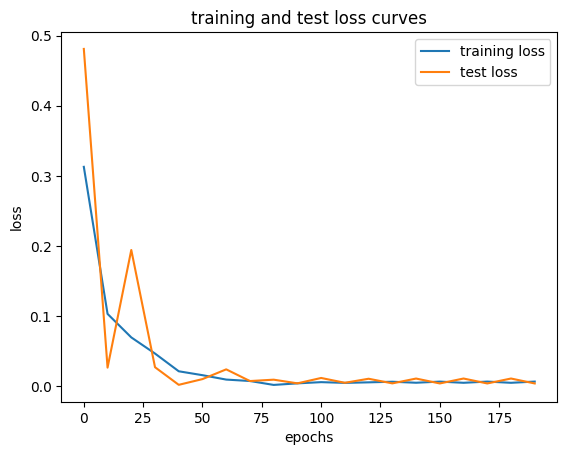

In [ ]:
plt.plot(epoch_count,loss_values,label = 'training loss')
plt.plot(epoch_count,test_loss_values,label = 'test loss')
plt.title('training and test loss curves')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend();

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.7034], requires_grad=True),
 Parameter containing:
 tensor([0.2938], requires_grad=True)]

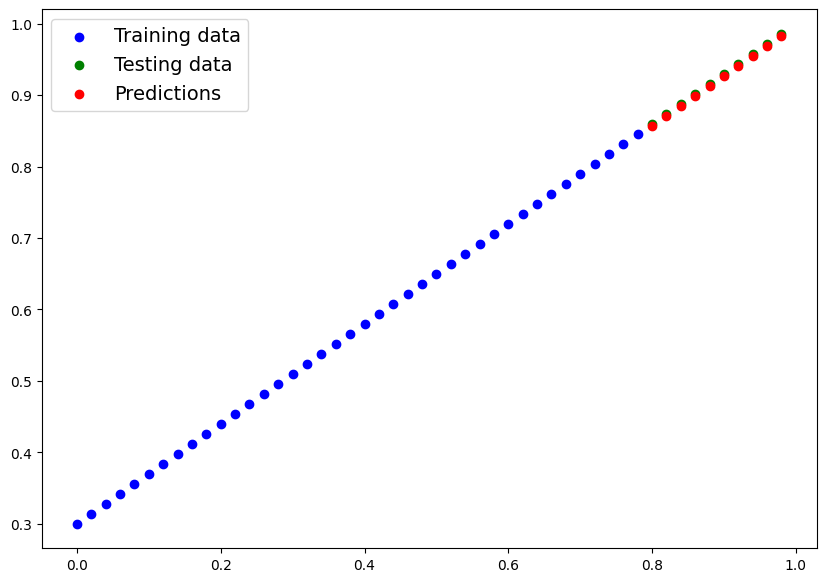

In [ ]:
plot_prediction(predictions = y_pred_new)

# Saving the model in Pytorch

In [ ]:
from pathlib import Path
model_path = Path('models')
model_path.mkdir(parents = True, exist_ok = True)
model_name = '01.pytorch_workflow_model.pth'
save_path = model_path / model_name
print(f'saving model to:{save_path}')
torch.save(obj = model_0.state_dict(),f = save_path)

saving model to:models/01.pytorch_workflow_model.pth


In [ ]:
!ls -1 models

01.pytorch_workflow_model.pth


# Loading the saved model

To load  in a saved state_dict we have to instantiate a new instance of the model class

load the saved state_dict of model_0(this will update the new instance with updated parameters)


In [ ]:
loaded_model_0 = LinearRegression()
loaded_model_0.load_state_dict(torch.load(f = save_path))


<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.7034])), ('bias', tensor([0.2938]))])

make some prediction with the loaded model

In [ ]:
 loaded_model_0.eval()
 with torch.inference_mode():
  y_loaded_pred = loaded_model_0(X_test)

In [ ]:
y_loaded_pred

tensor([[0.8565],
        [0.8706],
        [0.8847],
        [0.8987],
        [0.9128],
        [0.9269],
        [0.9409],
        [0.9550],
        [0.9691],
        [0.9831]])

In [ ]:
y_pred_new == y_loaded_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting all together

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# device agnoustic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# data

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

split the data

In [ ]:
train_split = int(0.8* len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [ ]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

create the plot prediction function

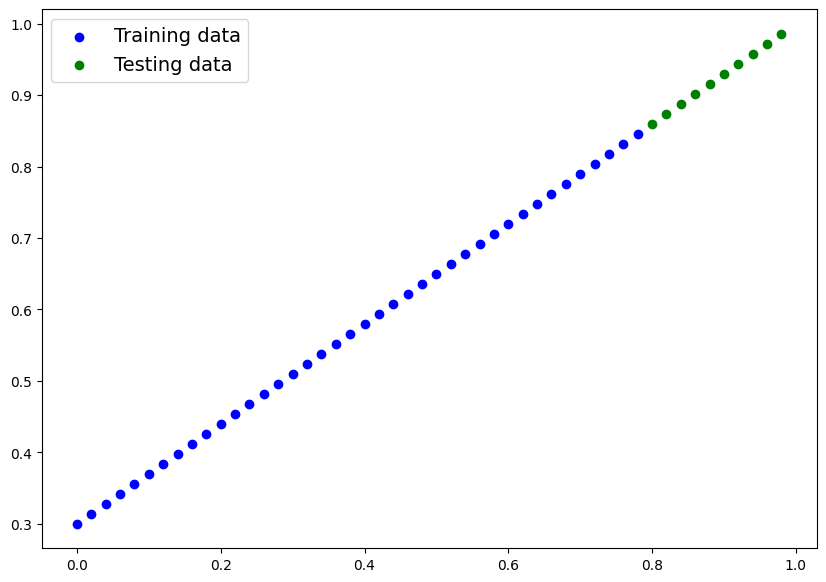

In [ ]:
plot_prediction(X_train, y_train, X_test, y_test)

create the model

In [ ]:
class LinearRegression(torch.nn.module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad = True,dtype = torch.float))
  def forward(self,x:torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias


# Using Linear layer from Torch.nn

In [ ]:
class LinearRegressionV2(nn.Module):
  def __init__(self):
    super().__init__()
    # use nn.Linear() for creating the model parameters
    self.linear_layer = nn.Linear(in_features = 1, out_features = 1)

  # forward method
  def forward(self,X:torch.Tensor)-> torch.tensor:
    return self.linear_layer(X)

torch.manual_seed(42)
model_1 = LinearRegressionV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(),lr = 0.01)

# Train the model using the train loop and testing loop

In [ ]:
torch.manual_seed(42)
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []
for epoch in range(epochs):
  epoch_count.append(epoch)
  model_1.train()
  y_pred = model_1(X_train)
  train_loss = loss_fn(y_pred, y_train)
  loss_values.append(train_loss)
  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred, y_test)
    test_loss_values.append(test_loss)
    if epoch % 10 == 0:
      print(f'epoch:{epoch}, loss = {train_loss},test_loss:{test_loss}')

epoch:0, loss = 0.5551779866218567,test_loss:0.5739762187004089
epoch:10, loss = 0.4399680495262146,test_loss:0.4392663538455963
epoch:20, loss = 0.3247582018375397,test_loss:0.30455657839775085
epoch:30, loss = 0.20954827964305878,test_loss:0.16984674334526062
epoch:40, loss = 0.09433844685554504,test_loss:0.03513689711689949
epoch:50, loss = 0.023886386305093765,test_loss:0.04784906655550003
epoch:60, loss = 0.0199567973613739,test_loss:0.04580312222242355
epoch:70, loss = 0.016517987474799156,test_loss:0.0375305712223053
epoch:80, loss = 0.013089170679450035,test_loss:0.029944902285933495
epoch:90, loss = 0.009653178043663502,test_loss:0.02167237363755703
epoch:100, loss = 0.006215679459273815,test_loss:0.014086711220443249
epoch:110, loss = 0.002787243574857712,test_loss:0.005814164876937866
epoch:120, loss = 0.0012645035749301314,test_loss:0.013801807537674904
epoch:130, loss = 0.0012645035749301314,test_loss:0.013801807537674904
epoch:140, loss = 0.0012645035749301314,test_loss:0

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

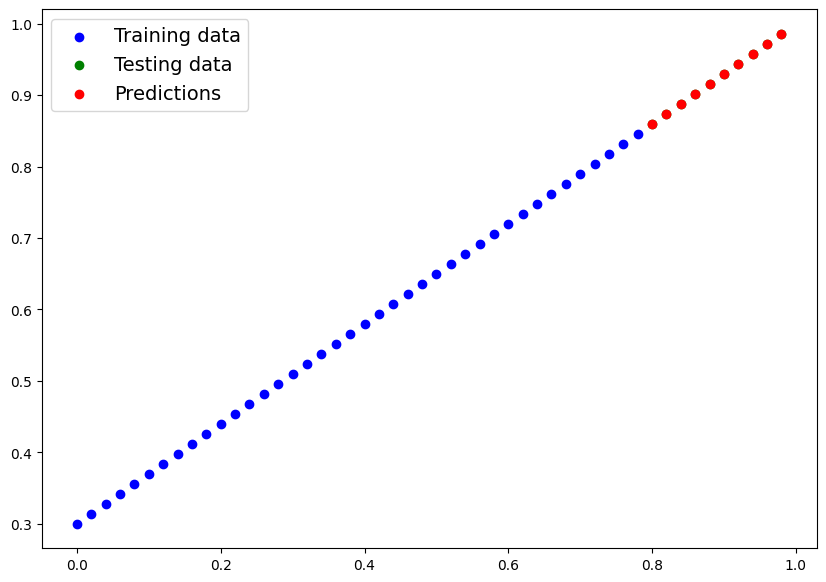

In [ ]:
plot_prediction(predictions = test_pred)

In [ ]:
y_pred = model_1(X_test)
y_pred

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], grad_fn=<AddmmBackward0>)

In [ ]:
epoch_values = torch.tensor(epoch_count).cpu().numpy()
loss_values = torch.tensor(loss_values).cpu().numpy()
test_loss_values = torch.tensor(test_loss_values).cpu().numpy()

plotting of the train_loss and test_loss function

Text(0, 0.5, 'loss')

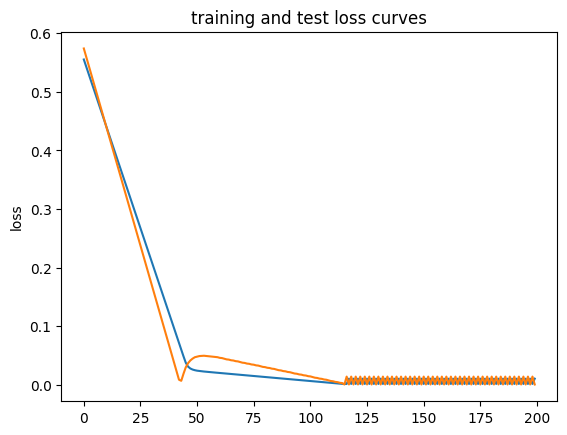

In [ ]:
plt.plot(epoch_values, loss_values, label = 'training loss')
plt.plot(epoch_values, test_loss_values, label = 'test loss')
plt.title('training and test loss curves')
plt.ylabel('loss')

saving the model

In [ ]:
from pathlib import Path
model_path = Path('models1')
model_path.mkdir(parents = True, exist_ok = True)
model_name = '01.model_1.pth'
saved_path = model_path / model_name
torch.save(obj = model_1.state_dict(),f = saved_path)
print(f'saved path:{saved_path}')

saved path:models1/01.model_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

loading the model

In [ ]:
model_11 = LinearRegressionV2()
model_11.state_dict()
model_11.load_state_dict(torch.load(f = saved_path))
model_11.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

In [ ]:
model_11.eval()
with torch.inference_mode():
  y_pred = model_11(X_test)
y_pred == test_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])